In [1]:
import sys
import warnings
warnings.filterwarnings(action='ignore')
import collections
from IPython.display import display
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

mpl.rcParams['axes.unicode_minus'] = False
font_fname = '/Users/seongdae/Library/Fonts/NanumGothicLight.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
# size, family
print ('font size : '+str(plt.rcParams['font.size']) )
print ('font family : '+str(plt.rcParams['font.family']) )
# import default setting
print('python version : {0}\npandas version : {1}\nmatplotlib version : {2}\nnumpy version : {3}\n'
.format(sys.version, pd.__version__, mpl.__version__, np.__version__))

font size : 10.0
font family : ['NanumGothic']
python version : 3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
pandas version : 0.25.3
matplotlib version : 3.1.2
numpy version : 1.18.1



In [2]:
# ensemble 알고리즘의 일종
# two_moons, cancer dataset use
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise = 0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify = ym, random_state = 42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state = 0)

# 배깅(Bootstrap aggregating)

In [3]:
# 배깅은 중복을 허용한 랜덤 샘플링으로 만든 훈련 데이터셋을 사용하여 분류기를 각기 다르게 학습시킴
# 부트스트랩 샘플을 만드는 것은 앞서 살펴본 랜덤 포레스트의 특징과 같음
# 분류기가 predict_proba() 메서드를 지원하는 경우 확률값을 평균하여 예측을 수행함
# 그렇지 않은 분류기는, 가장 빈도가 높은 클래스 레이블이 예측 결과가 됨

# 배깅을 사용하여, cancer 데이터셋에 회귀 모델을 100개 훈련하여 앙상블

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score=True, n_jobs=-1, 
                            random_state=42).fit(Xc_train, yc_train)

In [5]:
# LogisticRegression 객체를 기반 분류기로 전달, 훈련할 분류기의 개수 100개 지정
# oob_score 매개 변수를 True로 지정하면, 매개변수는 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가함(이 값을 out of bag 오차라고도 함)
    # oob_score를 통해 테스트의 성능을 짐작 할 수 있음, RandomForestClassifier 도 지원함, 둘다 기본값은 False
print('훈련 세트 정확도{:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('테스트 세트 정확도{:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('OOB 샘플의 정확도{:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도0.958
테스트 세트 정확도0.958
OOB 샘플의 정확도0.944


In [6]:
# 결정트리로 배깅을 수행하는 것보다 랜덤 포레스트를 사용하는 것이 편리하지만, 여기서는 결정트리에 배깅을 적용해보겠음

In [7]:
from sklearn.tree import DecisionTreeClassifier
bagging_tree = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, 
                                 n_jobs=-1, random_state=42).fit(Xm_train, ym_train)
# 랜덤포레스트때처럼, 배깅 분류기에 있는 결정 트리의 결정 경계를 시각화

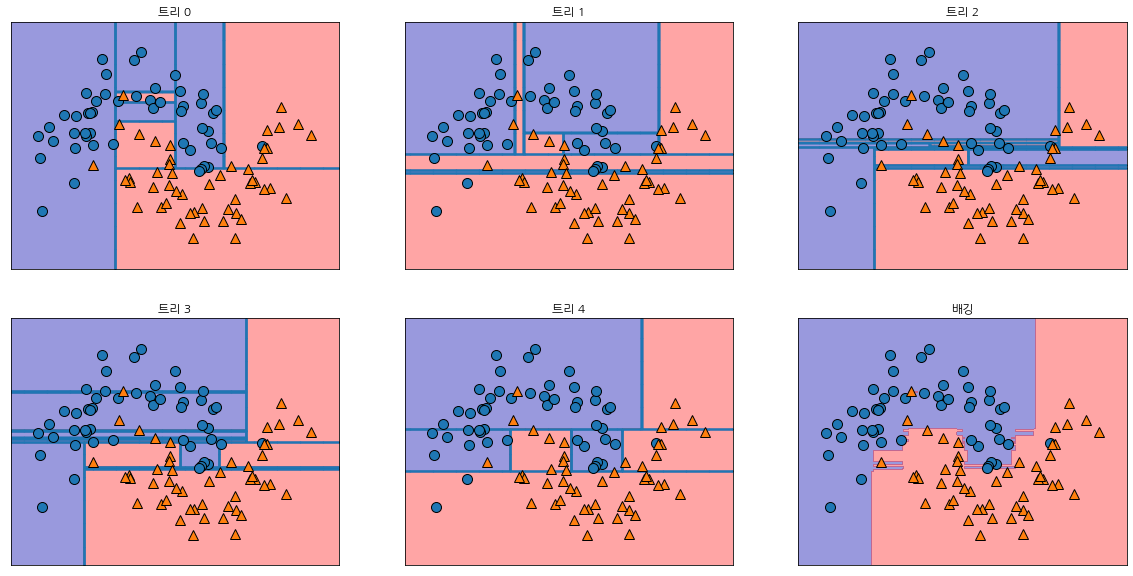

In [8]:
# 랜덤포레스트때처럼, 배깅 분류기에 있는 결정 트리의 결정 경계를 시각화
fig, axes = plt.subplots(2, 3, figsize = (20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging_tree.estimators_)):
    # i < index, ax < axes.ravel_ Subplot 정보, tree < tree정보
    # 다차원 배열(array)을 1차원 배열로 평평하게 펴주는 NumPy의 ravel()
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
mglearn.plots.plot_2d_separator(bagging_tree, Xm, fill=True, ax=axes[-1,-1], alpha =.4)
axes[-1,-1].set_title('배깅')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
# axes[-1, -1] << 2,3 행렬 형태의 subplots 에서 -1행,-1열 (맨끝행, 맨끝열) 의미

In [9]:
# 결정트리 100개로 늘린후, 성능 확인

bagging_tree100 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, 
                                 n_jobs=-1, oob_score=True, random_state=42).fit(Xc_train, yc_train)

print('훈련 세트 정확도{:.3f}'.format(bagging_tree100.score(Xc_train, yc_train)))
print('테스트 세트 정확도{:.3f}'.format(bagging_tree100.score(Xc_test, yc_test)))
print('OOB 샘플의 정확도{:.3f}'.format(bagging_tree100.oob_score_))

훈련 세트 정확도1.000
테스트 세트 정확도0.965
OOB 샘플의 정확도0.951


## 배깅 정리

In [10]:
# logistic 객체를 기반 분류기로 지정했을 때보다 스코어는 높으나, 훈련세트 1.0 < 과적합일지도..
# 배깅은 랜덤 포레스트와 달리 max_samples 매개변수에서 부트스트랩 샘플의 크기를 지정 할 수 있음
    # 랜덤 포레스트는 DecisionTreeClassifier(splitter='best')를 사용하도록 고정되어 있음
    # 배깅은 결정트리를 splitter = 'random'으로 설정하면 무작위로 분할한 후보 노드 중에서 최선을 찾음
    # 이런 결정 트리의 배깅 앙상블 > 엑스트라 트리와 관련이 깊음

# 엑스트라 트리

In [11]:
# 랜덤 포레스트와 비슷하지만, 후보 특성을 무작위로 분할한 다음 최적의 분할을 찾음
# 포레스트 트리의 각 후보 특성을 무작위로 분할하는 식으로 무작위성을 증가
# 랜덤 포레스트와 달리, DecisionTreeClassifer(splitter='random')을 사용하고, 부트스트랩 샘플링은 사용하지 않음

# 무작위성을 증가시키면 일반적으로, 모델의 편향이 늘어나지만 분산이 감소함 == 과적합은 감소, 과소적합 가능성 늘어남
    # 분산 Varience : 모델을 여러 번 훈련 했을 때 특정 샘플에 대한 예측의 일관성(변동성)을 측정
    # 분산이 크다 == 과적합 발생 (무작위성에 민감해짐), 데이터에 대해서 너무 민감하게 반응함
    # 편향 Bias : 다른 훈련 데이터 셋에서 여러 번 훈련 했을때 예측이 얼마나 벗어났는지 측정함, 편향은 무작위성이 아니라 구조적인 에러를 나타냄
    # 편향이 크다 == 과소적합, 학습데이터를 충분히 표현할 수 없다

# 랜덤포레스트와 엑스트라 트리는 다른 방법으로 무작위성을 주입함
# 예측 방식은 랜덤 포레스트와 엑스트라 트리는 동일하게, 각 트리가 만든 확률값을 평균함

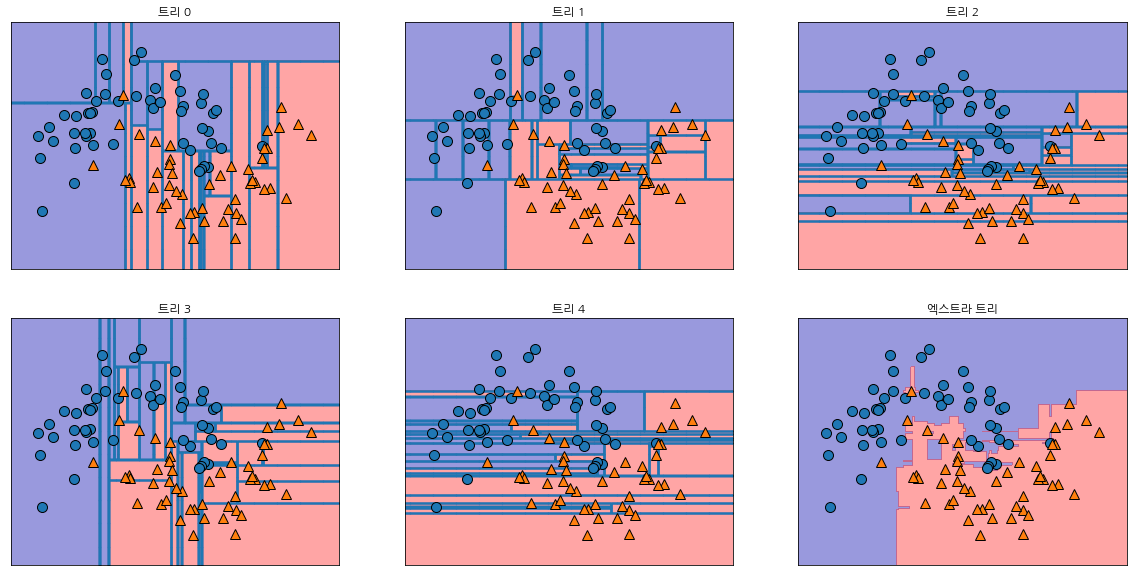

In [12]:
# two moons dataset use, 결정경계 확인
# 후보 노드를 랜덤하게 분할한 다음, 최선의 분할을 찾기 때문에 개별 트리의 결정경계가 더 복잡해짐
# 하지만 그 개별트리를 앙상블한 결과는 비교적 안정적

from sklearn.ensemble import ExtraTreesClassifier

xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0).fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
mglearn.plots.plot_2d_separator(xtree, Xm, fill = True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title('엑스트라 트리')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [13]:
# ExtraTreesClassifier 트리 갯수 100개, use breast cancer dataset
xtree100 = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state = 0).fit(Xc_train, yc_train)

print('훈련 세트 정확도{:.4f}'.format(xtree100.score(Xc_train, yc_train)))
print('테스트 세트 정확도{:.4f}'.format(xtree100.score(Xc_test, yc_test)))

훈련 세트 정확도1.0000
테스트 세트 정확도0.9720


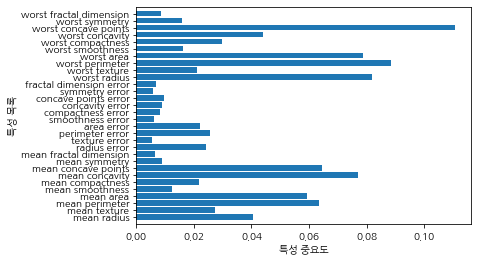

In [14]:
# 이 예에서 엑스트라 트리는 랜덤 포레스트와 거의 같은 성능을 냄
# 엑스트라 트리가 랜덤 포레스트보다 계산 비용이 비교적 적지만
# 무작위 특성 분할 때문에 일반화 성능을 위해선 종종 많은 트리를 만들어야함
# 특성 중요도도 랜덤포레스트와 비슷함(0값을 가지지 않음_그래디언트 부스팅은 중요하지 않으면 0값을 가지는..)
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree100.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성 목록')
plt.ylim(-1, n_features)
plt.show()

# 에이다부스트

In [15]:
# Adaboost, Adaptive Boosting의 줄임말
# 에이다부스트는 그래디언트 부스팅처럼 약한 학습기를 사용
    # 그래디언트 부스팅과는 달리, 이전의 모델이 잘못 분류한 샘플에 가중치(분류를 위한 샘플의 가중치)를 높여서 다음 모델을 훈련시킴
    # 훈련된 각 모델은 성능에 따라 가중치(성능에 따른 모델의 가중치)가 부여됨
    # 예측을 만들 때는 모델이 예측한 레이블을 기준으로 모델의 가중치(성능에 따른 모델의 가중치들)를 합산하여
    # 가장 높은 값을 가진 레이블을 선택함
    
# AdaBoost는 이전의 분류기에 의해 잘못 분류된 것들을 이어지는 약한 학습기들이 수정해줄 수 있다는 점에서 다양한 상황에 적용할 수 있다(adaptive)
# 따라서 에이다 부스트는 잡음이 많은 데이터와 이상점(outlier)에 취약한 모습을 보임
# 그러나 또 다른 경우에는, 다른 학습 알고리즘보다 과적합(overfitting)에 덜 취약한 모습을 보이기도 함

# 개별 학습기들의 성능이 떨어지더라도, 각각의 성능이 무작위 추정보다 조금이라도 더 낫다면 (이진 분류에서 에러율이 0.5보다 낮다면)
# 최종 모델은 강한 학습기로 수렴한다는 것을 증명할 수 있음

In [16]:
# scikit-learn 에서 AdaBoostClassifier 는 기본값으로 DecisionTreeClassifier(max_depth=1)을 사용
# AdaBoostRegressor는 DecisionTreeRegressor(max_depth=3)를 사용
    # base_estimator 매개변수에서 다른 모델을 사용 할 수 있음
# 그래디언트 부스팅과 마찬가지로, 순차적으로 트리를 학습하기 때문에 n_jobs 지원 x

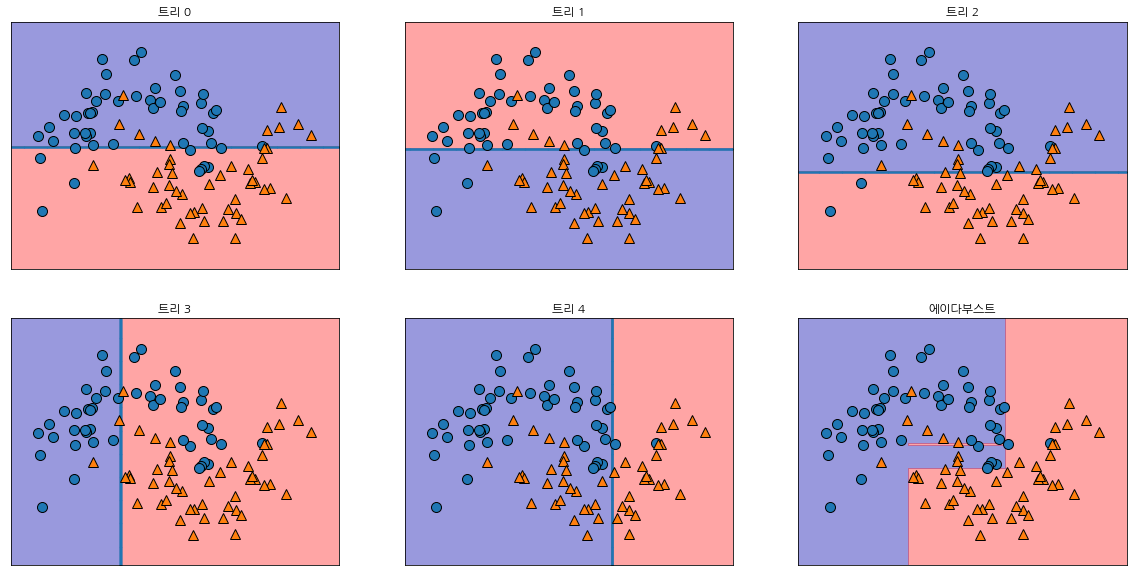

훈련 세트 정확도 : 0.907
테스트 세트 정확도 : 0.880


In [17]:
from sklearn.ensemble import AdaBoostClassifier
# two moons dataset use

ada = AdaBoostClassifier(n_estimators= 5, random_state= 0, learning_rate=1.7).fit(Xm_train, ym_train)
# learning_rate Default Value : 1.0

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
mglearn.plots.plot_2d_separator(ada, Xm, fill = True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title('에이다부스트')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()
print('훈련 세트 정확도 : {:.3f}'.format(ada.score(Xm_train, ym_train)))
print('테스트 세트 정확도 : {:.3f}'.format(ada.score(Xm_test, ym_test)))


In [18]:
# AdaBoostClassifier는 깊이가 1인 결정 트리를 사용하기 때문에, 각 트리의 결정 경계가 직선 하나임
# 앙상블된 결정 경계도 비교적 다른 앙상블에 비해서 단순함

In [19]:
# cancer dataset use
ada_cancer = AdaBoostClassifier(n_estimators=100, random_state=42).fit(Xc_train, yc_train)
print('훈련 세트 정확도 : {:.3f}'.format(ada_cancer.score(Xc_train, yc_train)))
print('테스트 세트 정확도 : {:.3f}'.format(ada_cancer.score(Xc_test, yc_test)))


훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.986


(-1, 30)

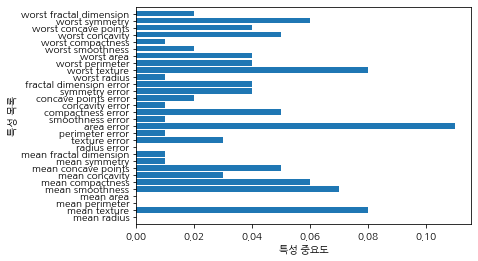

In [20]:
# 아주 얕은 트리(깊이 1) 100개를 앙상블 하여서 일반화 성능이 조금 더 향상됨
# 에이다 부스트의 특성 중요도를 살펴보면, 다른 모델에서 부각되지 않았던 'area error' 특성을 강조하고 있음
plt.barh(range(n_features), ada_cancer.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성 목록')
plt.ylim(-1, n_features)

In [21]:
# test = AdaBoostClassifier(n_estimators= 5, random_state= 0, learning_rate = 1.0 )
# min_val_error = float("inf")
# error_going_up = 0
# for learning_rate in np.arange(0.1, 2, 0.1):
#     print('learning_rate test : ', learning_rate)

#     test.learning_rate = learning_rate
#     test.fit(Xm_train, ym_train)
#     y_pred = test.predict(Xm_test)
#     print('test predict : ', test.score(Xm_test, ym_test))
#     val_error = mean_squared_error(ym_test, y_pred)
#     print('error : ', val_error)
#     if val_error < min_val_error:
#         min_val_error = val_error
#         error_going_up = 0
#         print('more : ', learning_rate)
#     else:
#         error_going_up += 1
#         print('stop ready', learning_rate)
#         if error_going_up == 6:
#             break  # 조기 종료
    # ealry stoping test
            